In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import commonPlot as plotr

%matplotlib inline

In [105]:
pd.set_option('precision',7)
mpl.rcParams['figure.figsize'] = (9.0, 5.0)  # default size of plots
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelsize'] = 16

mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 12
mpl.rcParams['ytick.major.size'] = 12
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.size'] = 6

mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['legend.framealpha'] = 0.85
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams['legend.numpoints'] = 1

mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})


In [74]:
%config InlineBackend.figure_format='svg'

In [7]:
df_2hdm_type2_h125 = pd.read_csv("Daniele_Plots/sigma_4tau_mh125_type2.dat", 
                                 sep="\t", names=["m_a", "xsec_br_4tau"])
print len(df_2hdm_type2_h125.index)

432


In [8]:
df_2hdm_type2_H125 = pd.read_csv("Daniele_Plots/sigma_4tau_mH125_type2-2.dat", 
                                 sep="\t", names=["m_a", "xsec_br_4tau"])
print len(df_2hdm_type2_H125.index)

636


In [9]:
scan_dicts = [
    {'df': df_2hdm_type2_h125,
     'label': r"$h_{125}$",
     'color': 'dodgerblue'},
    {'df': df_2hdm_type2_H125,
     'label': r"$H_{125}$",
     'color': 'indigo'},
]

In [10]:
with pd.HDFStore('exp_limits.h5') as store:
    df_hig_14_019 = store['CMS_HIG_14_019']
    df_hig_14_022 = store['CMS_HIG_14_022']
    df_hig_14_041 = store['CMS_HIG_14_041']
    df_hig_15_011 = store['CMS_HIG_15_011']
    df_atlas_higg_2014_02 = store['ATLAS_HIGG_2014_02']

In [44]:
# Experimental contributions to put on plot
experimental_dicts = [
    {'df': df_hig_14_019,
     'label': 'CMS HIG-14-019 ' + r'$(4\tau)$',
     'color': 'blue'},
    {'df': df_hig_14_022,
     'label': 'CMS HIG-14-022 ' + r'$(4\tau)$',
     'color': 'green'},
#     {'df': df_hig_15_011,
#      'label': 'CMS HIG-15-011 ' + r'$(2\tau2\mu)$',
#      'color': 'orange'},
#     {'df': df_hig_14_041,
#      'label': 'CMS HIG-14-041 ' + r'$(2b2\mu)$',
#      'color': 'fucshia'},
    {'df': df_atlas_higg_2014_02,
     'label': 'ATLAS HIGG-2014-02 ' + r'$(2\tau2\mu)$',
     'color': 'red'},
]


In [45]:
# Experimental contributions to put on plot
experimental_dicts_all = [
    {'df': df_hig_14_019,
     'label': 'CMS HIG-14-019 ' + r'$(4\tau)$',
     'color': 'blue'},
    {'df': df_hig_14_022,
     'label': 'CMS HIG-14-022 ' + r'$(4\tau)$',
     'color': 'green'},
    {'df': df_hig_15_011,
     'label': 'CMS HIG-15-011 ' + r'$(2\tau2\mu)$',
     'color': 'orange'},
#     {'df': df_hig_14_041,
#      'label': 'CMS HIG-14-041 ' + r'$(2b2\mu)$',
#      'color': 'fucshia'},
    {'df': df_atlas_higg_2014_02,
     'label': 'ATLAS HIGG-2014-02 ' + r'$(2\tau2\mu)$',
     'color': 'red'},
]


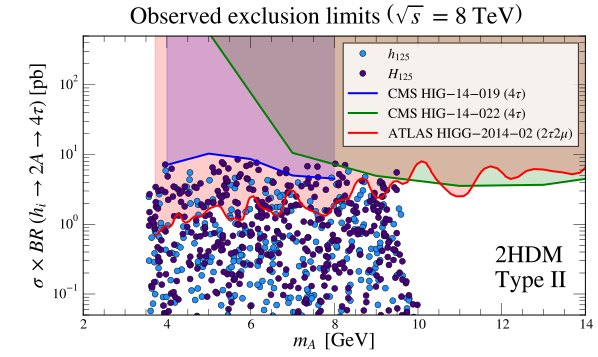

In [101]:
title = 'Observed exclusion limits ' + r'$\left(\sqrt{s}\ =\ 8\ \mathrm{TeV}\right)$'
common_text = '2HDM\nType II'
str_mA = r'$m_A\ \mathrm{[GeV]}$'
str_xsec_4tau = r'$\sigma\ \times\ BR\ (h_i\ \to\ 2A\ \to\ 4\tau)\ \mathrm{[pb]}$'

plotr.plot_scan_exclusions(scan_dicts, experimental_dicts,
                           y_var='xsec_br_4tau',
                           x_label=str_mA,
                           y_label=str_xsec_4tau,
                           x_range=[2, 14],
                           y_range=[0.05, 5E2],
                           title=title,
                           text=common_text, text_coords=[0.82, 0.1])

In [43]:
with pd.HDFStore("../points_MICRO_SCAN_I42_NTv482_HBv421_REDUCED_3_02_Nov_15_1041.h5") as store:
    df_nmssm_lt10 = store.full12loop_good_posMuMagMom_planckUpperOnly
    df_all = store.full12loop_all

In [47]:
df_nmssm = df_all[df_all.constraints == '']

In [57]:
df_nmssm['xsec_ggf8_h1_2a_4tau'] = (df_nmssm['xsec_ggf8_h1'] * df_nmssm['h1ggrc2'] 
                                    * df_nmssm['Brh1a1a1'] * df_nmssm.Bra1tautau * df_nmssm.Bra1tautau)
df_nmssm['xsec_ggf8_h2_2a_4tau'] = (df_nmssm['xsec_ggf8_h2'] * df_nmssm['h2ggrc2'] 
                                    * df_nmssm['Brh2a1a1'] * df_nmssm.Bra1tautau * df_nmssm.Bra1tautau)


/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [58]:
df_nmssm_h1 = df_nmssm.copy()[(df_nmssm.mh1 < 128) & (df_nmssm.mh1 > 122)]
df_nmssm_h2 = df_nmssm.copy()[(df_nmssm.mh2 < 128) & (df_nmssm.mh2 > 122)]

In [59]:
df_nmssm_h1.rename(columns={'xsec_ggf8_h1_2a_4tau': 'xsec_br_4tau', 'ma1': 'm_a'}, inplace=True)
df_nmssm_h2.rename(columns={'xsec_ggf8_h2_2a_4tau': 'xsec_br_4tau', 'ma1': 'm_a'}, inplace=True)

In [60]:
for df in [df_nmssm_h1, df_nmssm_h2]:
    drop_cols = list(df.columns)[:]
    drop_cols.remove('m_a')
    drop_cols.remove('xsec_br_4tau')
    df.drop(drop_cols, 1, inplace=True)

In [92]:
nmssm_scan_dicts = [
    {'df': df_nmssm_h1, 
     "label": r"$h_1\ =\ h_{125}$",
     'color': 'dodgerblue'},
    {'df': df_nmssm_h2, 
     "label": r"$h_2\ =\ h_{125}$",
     'color': 'indigo'}
]

In [95]:
str_ma = r'$m_{a_1}\ \mathrm{[GeV]}$'
common_text_nmssm = 'NMSSM'
str_xsec_4tau = r'$\sigma\ \times\ BR\ (h_i\ \to\ 2a_1\ \to\ 4\tau)\ \mathrm{[pb]}$'

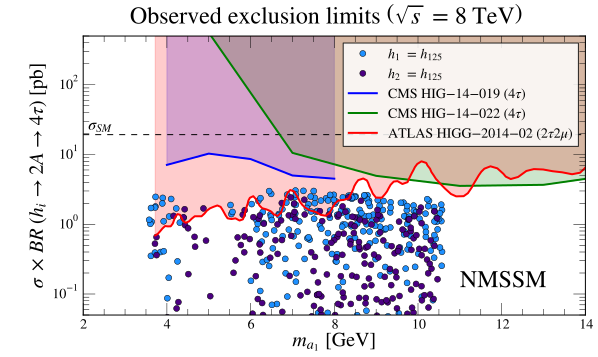

In [109]:
plotr.plot_scan_exclusions(nmssm_scan_dicts, experimental_dicts, 
                           y_var='xsec_br_4tau',
                           x_label=str_ma,
                           y_label=str_xsec_4tau,
                           x_range=[2, 14],
                           y_range=[0.05, 5E2],
                           title=title,
                           text=common_text_nmssm, text_coords=[0.75, 0.1])
plotr.draw_xsec_sm()
plt.savefig('NMSSM_Plots/xsec_br_4tau_nmssm.svg')
plt.savefig('NMSSM_Plots/xsec_br_4tau_nmssm.pdf')
plt.savefig('NMSSM_Plots/xsec_br_4tau_nmssm.png')

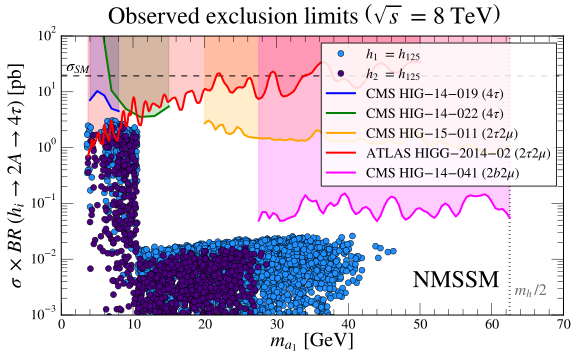

In [108]:
df_hig_14_041_tmp = df_hig_14_041.copy()
df_hig_14_041_tmp['xsec_br_4tau'] = df_hig_14_041_tmp['xsec_br_4tau_type2_tb0p5']
experimental_dicts_all_nmssm = experimental_dicts_all[:]
experimental_dicts_all_nmssm.append(
    {'df': df_hig_14_041_tmp,
     'label': 'CMS HIG-14-041 ' + r'$(2b2\mu)$',
     'color': 'fuchsia'}        
    )
plotr.plot_scan_exclusions(nmssm_scan_dicts, experimental_dicts_all_nmssm, 
                           y_var='xsec_br_4tau',
                           x_label=str_ma,
                           y_label=str_xsec_4tau,
                           x_range=[0, 70],
                           y_range=[0.001, 1E2],
                           title=title,
                           text=common_text_nmssm, text_coords=[0.7, 0.1])
plotr.draw_xsec_sm()
plt.savefig('NMSSM_Plots/xsec_br_4tau_all_nmssm.svg')
plt.savefig('NMSSM_Plots/xsec_br_4tau_all_nmssm.pdf')
plt.savefig('NMSSM_Plots/xsec_br_4tau_all_nmssm.png')

In [84]:
df_hig_14_041.columns

Index([u'm_a', u'xsec_br_2b2mu', u'br_2b2mu', u'xsec_br_4tau_type1_tb1',
       u'br_4tau_type1_tb1', u'xsec_br_4tau_type2_tb0p5',
       u'br_4tau_type2_tb0p5', u'xsec_br_4tau_type2_tb5', u'br_4tau_type2_tb5',
       u'xsec_br_4tau_type3_tb0p5', u'br_4tau_type3_tb0p5',
       u'xsec_br_4tau_type3_tb5', u'br_4tau_type3_tb5',
       u'xsec_br_4tau_type4_tb0p5', u'br_4tau_type4_tb0p5',
       u'xsec_br_4tau_type4_tb5', u'br_4tau_type4_tb5',
       u'xsec_br_2tau2mu_type1_tb1', u'xsec_br_4mu_type1_tb1',
       u'br_2tau2mu_type1_tb1', u'br_4mu_type1_tb1',
       u'xsec_br_2tau2mu_type2_tb0p5', u'xsec_br_4mu_type2_tb0p5',
       u'br_2tau2mu_type2_tb0p5', u'br_4mu_type2_tb0p5',
       u'xsec_br_2tau2mu_type2_tb5', u'xsec_br_4mu_type2_tb5',
       u'br_2tau2mu_type2_tb5', u'br_4mu_type2_tb5',
       u'xsec_br_2tau2mu_type3_tb0p5', u'xsec_br_4mu_type3_tb0p5',
       u'br_2tau2mu_type3_tb0p5', u'br_4mu_type3_tb0p5',
       u'xsec_br_2tau2mu_type3_tb5', u'xsec_br_4mu_type3_tb5',
       u'br_2t